In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/My Drive/DATASET/TRAIN'
test_dir = '/content/drive/My Drive/DATASET/TEST'
     

In [ ]:
batch_size = 32
img_height = 64
img_width = 64

In [ ]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
     

Found 14517 files belonging to 2 classes.
Using 11614 files for training.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1825 files belonging to 2 classes.
Using 365 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['O', 'R']


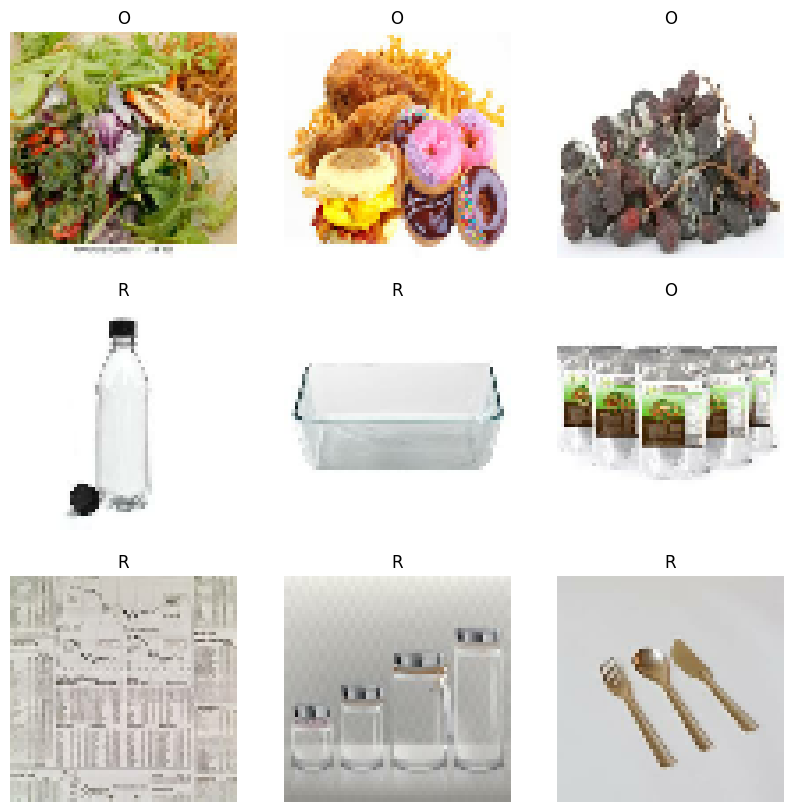

In [ ]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
     

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
X_train, y_train = next(iter(normalized_ds))
first_image = X_train[0]
print(np.min(first_image), np.max(first_image))
     

0.32226157 1.0


In [ ]:
normalized_test = test_ds.map(lambda x, y: (normalization_layer(x), y))
X_test, y_test = next(iter(normalized_test))
first_img = X_test[0]
print(np.min(first_img), np.max(first_img))
     

0.0 1.0


In [ ]:
model = Sequential([                
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)), 
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dense(units=64, activation="relu"),
  tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.7257 - accuracy: 0.2812 - val_loss: 0.8929 - val_accuracy: 0.2500
Epoch 2/30
1/1 [==============================] - 1s 537ms/step - loss: 0.5847 - accuracy: 0.7188 - val_loss: 1.4057 - val_accuracy: 0.2500
Epoch 3/30
1/1 [==============================] - 0s 286ms/step - loss: 0.6024 - accuracy: 0.7188 - val_loss: 1.1578 - val_accuracy: 0.2500
Epoch 4/30
1/1 [==============================] - 0s 317ms/step - loss: 0.5553 - accuracy: 0.7188 - val_loss: 0.9050 - val_accuracy: 0.2500
Epoch 5/30
1/1 [==============================] - 0s 279ms/step - loss: 0.5475 - accuracy: 0.7188 - val_loss: 0.8712 - val_accuracy: 0.2500
Epoch 6/30
1/1 [==============================] - 0s 282ms/step - loss: 0.5281 - accuracy: 0.7188 - val_loss: 0.9970 - val_accuracy: 0.2500
Epoch 7/30
1/1 [==============================] - 0s 277ms/step - loss: 0.4877 - accuracy: 0.7188 - val_loss: 1.1307 - val_accuracy: 0.2500
Epoch 8/30
1/1 [=======

In [ ]:
loss, accuracy = model.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.5312


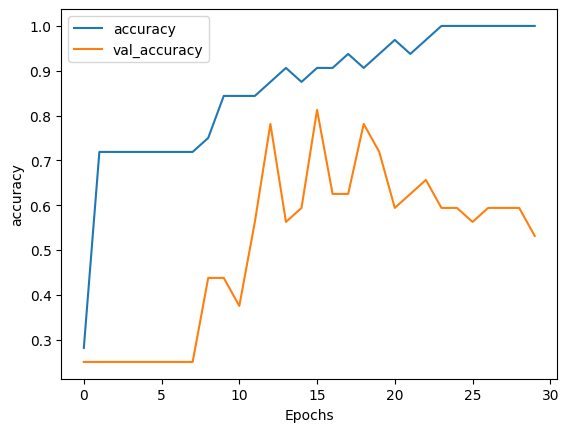

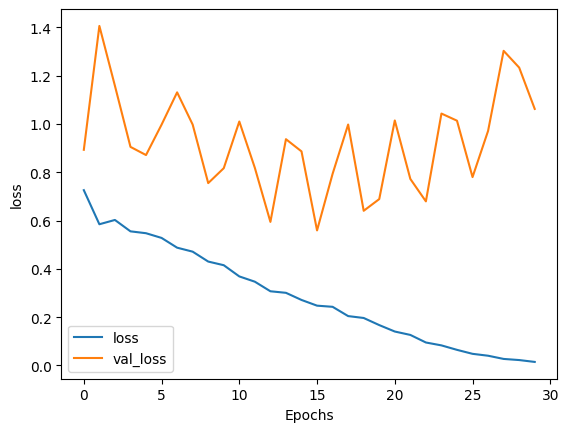

In [ ]:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:

model2 = Sequential([
   tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(32, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

In [ ]:

history_2 = model2.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)
    

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7121 - accuracy: 0.2812 - val_loss: 0.7314 - val_accuracy: 0.2500
Epoch 2/30
1/1 [==============================] - 0s 265ms/step - loss: 0.6654 - accuracy: 0.7188 - val_loss: 0.7979 - val_accuracy: 0.2500
Epoch 3/30
1/1 [==============================] - 0s 289ms/step - loss: 0.6217 - accuracy: 0.7188 - val_loss: 0.9418 - val_accuracy: 0.2500
Epoch 4/30
1/1 [==============================] - 0s 270ms/step - loss: 0.6085 - accuracy: 0.7188 - val_loss: 1.1680 - val_accuracy: 0.2500
Epoch 5/30
1/1 [==============================] - 0s 277ms/step - loss: 0.5717 - accuracy: 0.7188 - val_loss: 1.3188 - val_accuracy: 0.2500
Epoch 6/30
1/1 [==============================] - 0s 272ms/step - loss: 0.5848 - accuracy: 0.7188 - val_loss: 1.1823 - val_accuracy: 0.2500
Epoch 7/30
1/1 [==============================] - 0s 297ms/step - loss: 0.5699 - accuracy: 0.7188 - val_loss: 0.9933 - val_accuracy: 0.2500
Epoch 8/30
1/1 [=======

In [ ]:

loss, accuracy = model2.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
     

Training Accuracy: 0.7188
Testing Accuracy:  0.2500


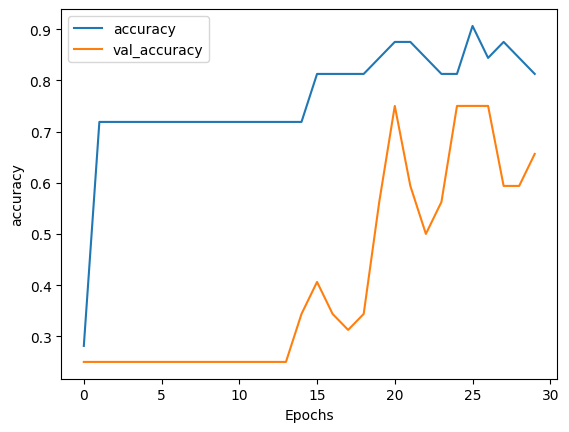

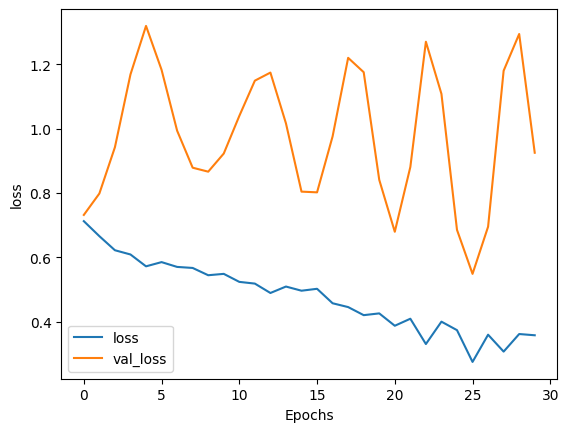

In [ ]:
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [ ]:
model3 = Sequential([
   tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dense(32, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer='adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model3.summary()
     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
history_3 = model3.fit(
    X_train, y_train,
    epochs = 40,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/40
1/1 [==============================] - 4s 4s/step - loss: 1.1526 - accuracy: 0.6875 - val_loss: 0.6974 - val_accuracy: 0.2500
Epoch 2/40
1/1 [==============================] - 0s 379ms/step - loss: 0.3276 - accuracy: 0.8750 - val_loss: 0.6998 - val_accuracy: 0.2500
Epoch 3/40
1/1 [==============================] - 0s 450ms/step - loss: 0.0759 - accuracy: 1.0000 - val_loss: 0.7029 - val_accuracy: 0.2500
Epoch 4/40
1/1 [==============================] - 0s 364ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.7066 - val_accuracy: 0.2500
Epoch 5/40
1/1 [==============================] - 0s 358ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.7086 - val_accuracy: 0.2500
Epoch 6/40
1/1 [==============================] - 0s 377ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.7099 - val_accuracy: 0.2500
Epoch 7/40
1/1 [==============================] - 0s 369ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.7129 - val_accuracy: 0.2500
Epoch 8/40
1/1 [=======

In [ ]:
loss, accuracy = model3.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Testing Accuracy:  0.2500
Training Accuracy: 0.7188


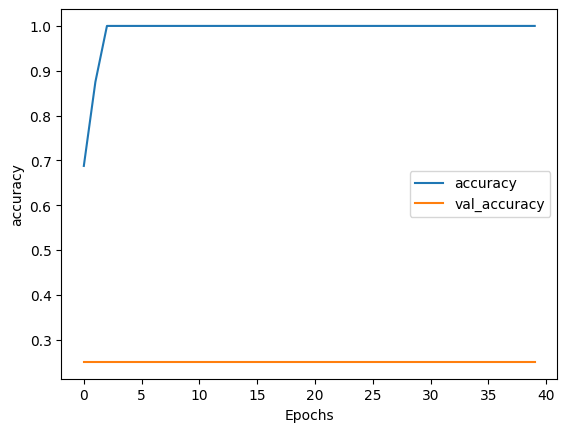

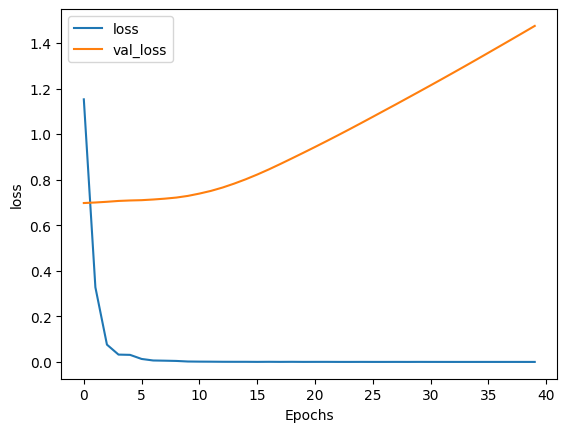

In [ ]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")
     